In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [2]:
df = pd.read_csv("spam.csv",encoding="ISO-8859-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Data Cleaning

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
5158,ham,I will come with karnan car. Please wait till ...
2692,spam,Urgent Urgent! We have 800 FREE flights to Eur...
3936,ham,"Yeah, in fact he just asked if we needed anyth..."
1988,ham,"Sorry, I'll call later"
91,ham,Sorry to be a pain. Is it ok if we meet anothe...


In [8]:
# Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
451,ham,Thanks for this hope you had a good day today
3071,ham,Ok lor... But buy wat?
4404,ham,Dun need to use dial up juz open da browser n ...
2179,ham,And popping &lt;#&gt; ibuprofens was no help.
1938,ham,Excellent! Are you ready to moan and scream in...


In [9]:
# encoding 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
# Removing duplicates
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

# EDA 

In [17]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

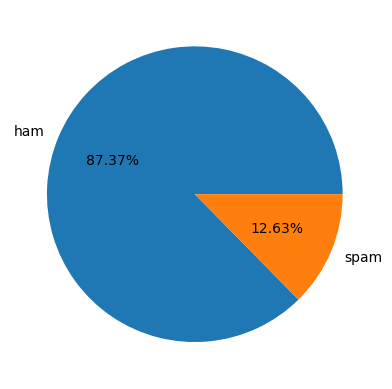

In [18]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f%%")
plt.show()

## Data is imbalanced

In [19]:
df['num_characters'] = df['text'].apply(len) # number of characters

In [20]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
#number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target          5169 non-null   int32 
 1   text            5169 non-null   object
 2   num_characters  5169 non-null   int64 
 3   num_words       5169 non-null   int64 
 4   num_sentences   5169 non-null   int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 222.1+ KB


In [25]:
df.describe(include='int64')

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
#ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe() #ham

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


Text(0.5, 1.0, 'Number of characters distribution over spam and ham')

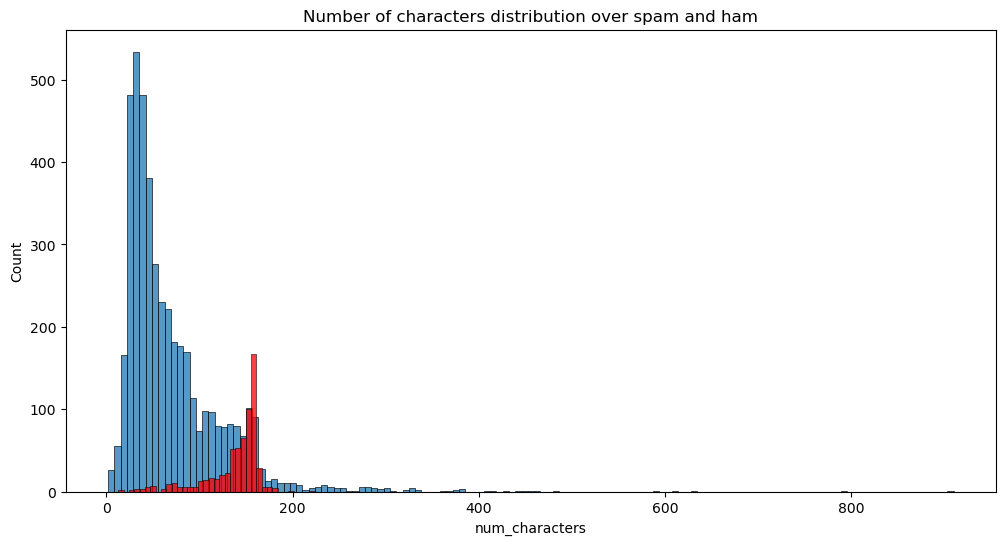

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
plt.title('Number of characters distribution over spam and ham')

### Most of the ham messages have less number of characters while the spam messages on an average have more characters

Text(0.5, 1.0, 'Number of words distribution over spam and ham')

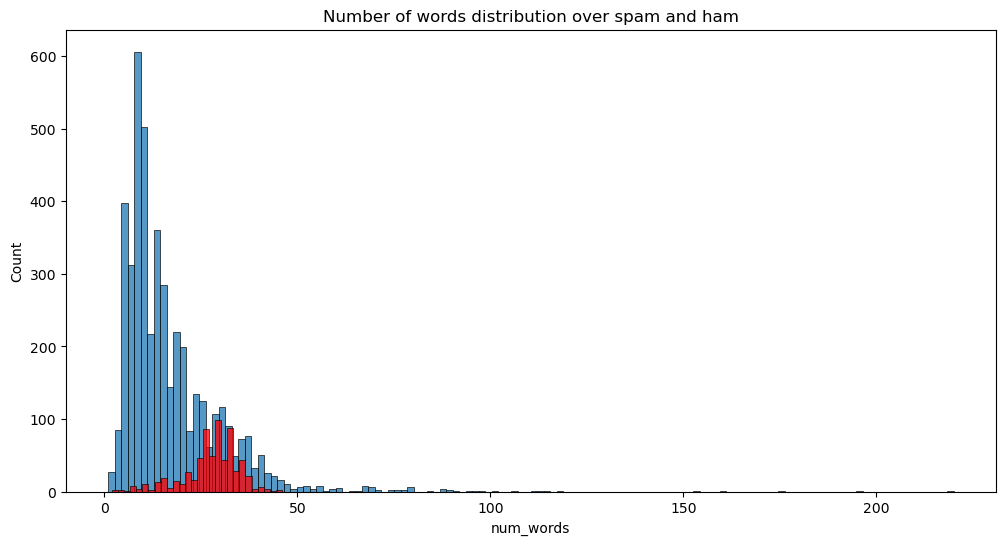

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.title('Number of words distribution over spam and ham')

### Most of the ham messages have less number of word while the spam messages on an average have more words.

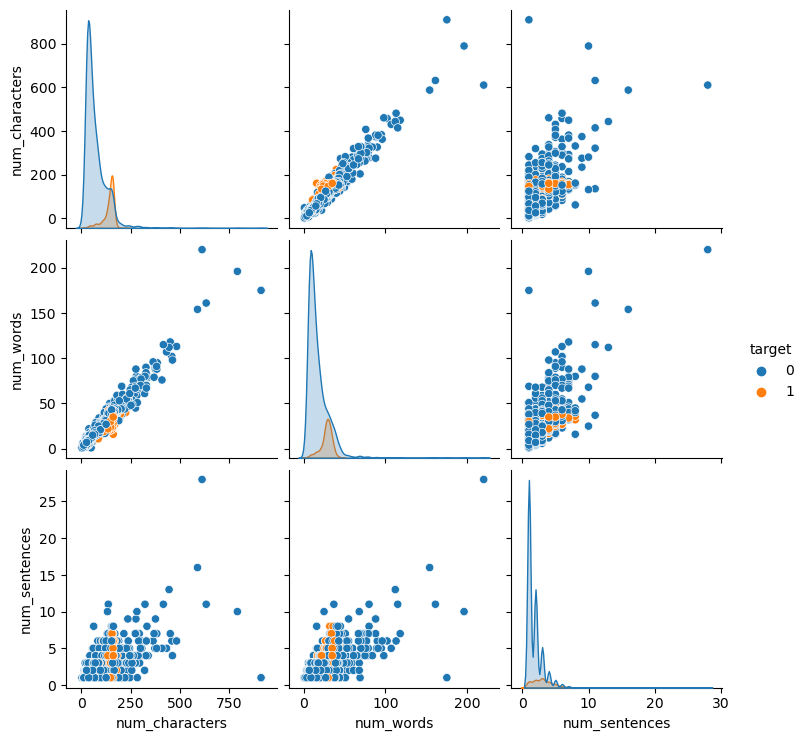

In [30]:
sns.pairplot(df,hue='target')

### Data has outliers

Text(0.5, 1.0, 'Correlation analysis')

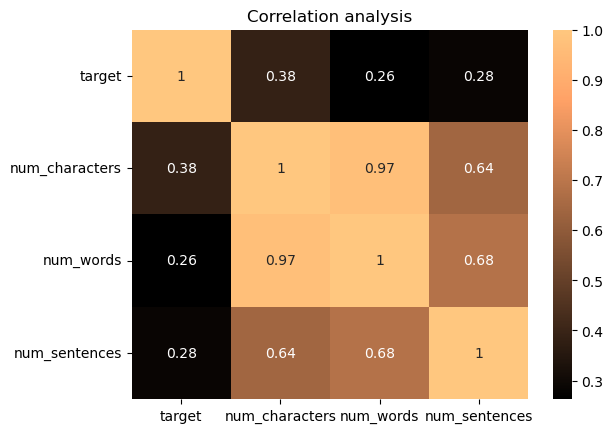

In [31]:
sns.heatmap(df.corr(),annot=True,cmap='copper')
plt.title("Correlation analysis")

- ### All three numerical column have high correlation
- ### Target column has positive correlation with numerical variables

# <mark>Data Preprocessing</mark>
- ### Lower case
- ### Tokenization
- ### Removing special characters
- ### Removing stop words and punctuation
- ### Stemming

In [32]:
# making a fuction to perform preprocessing techniques
def transform_text(text): 
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:] #cloning
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    ps=PorterStemmer()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [33]:
df['transformed_text'] = df['text'].apply(transform_text) #new column for transformed text

In [34]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Impotant words in hams and spams using word cloud

In [35]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white',collocations=False)

In [36]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

Text(0.5, 1.0, 'WordCloud: Spam')

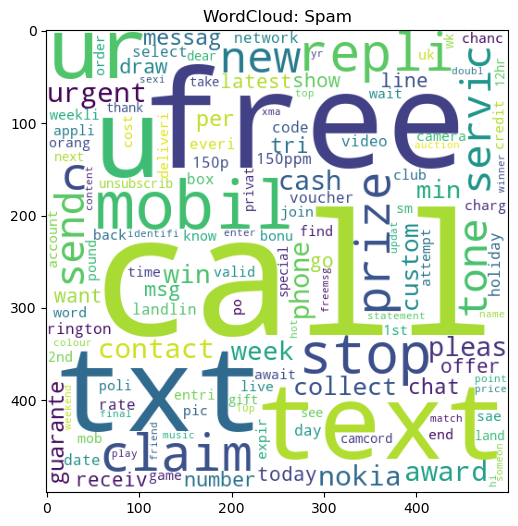

In [37]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.title("WordCloud: Spam")

### Most of the frequent words are what you usually get in spam messages like call,txt,mobile,free,etc.

In [38]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

Text(0.5, 1.0, 'Wordcloud: Ham')

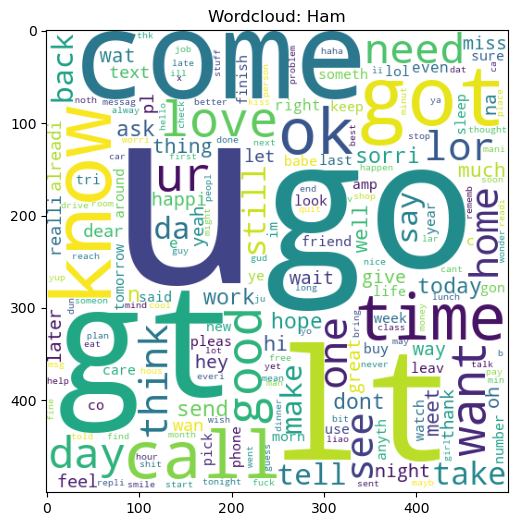

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.title('Wordcloud: Ham')

In [40]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [41]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [42]:
len(spam_corpus)

9939

In [43]:
from collections import Counter

Text(0.5, 1.0, '30 most frequent words in spam messages')

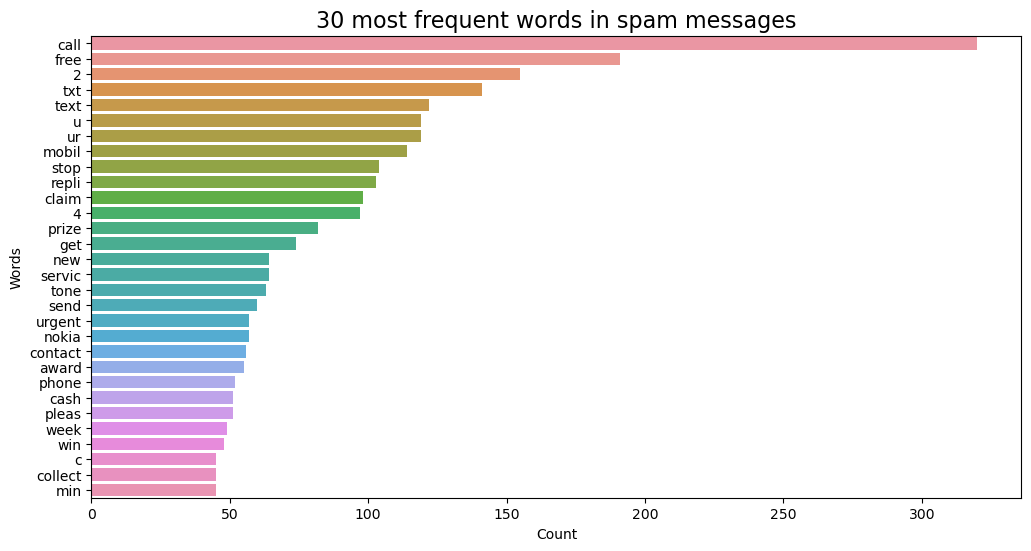

In [44]:
spam_30 = pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['Words','Count'])
fig,ax = plt.subplots(figsize= (12,6))
ax = sns.barplot(data=spam_30,x ='Count' ,y='Words',orient='h')
ax.set_title("30 most frequent words in spam messages",size=16)

Text(0.5, 1.0, '30 most frequent words in ham messages')

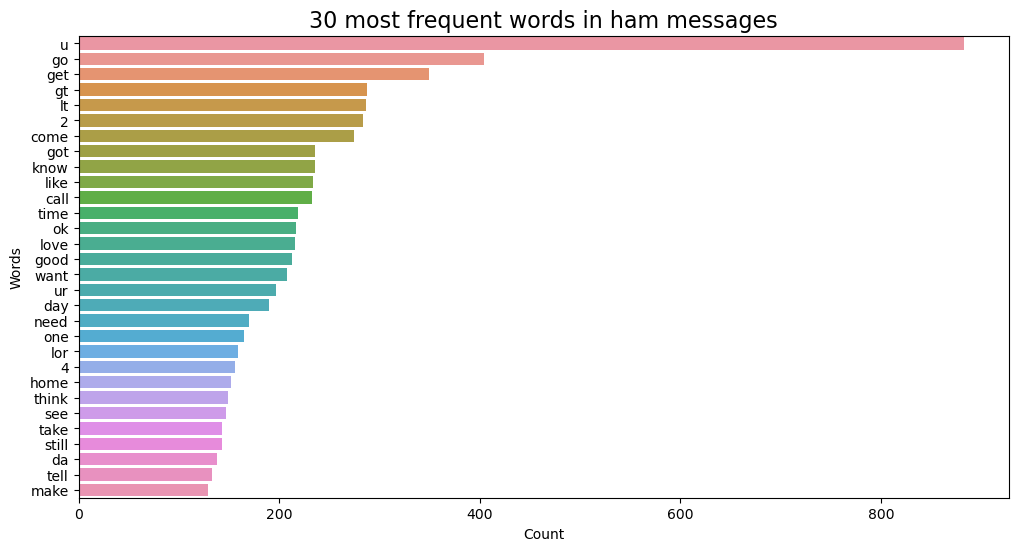

In [45]:
ham_30 = pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['Words','Count'])
fig,ax = plt.subplots(figsize= (12,6))
ax = sns.barplot(data=ham_30,x ='Count' ,y='Words',orient='h')
ax.set_title("30 most frequent words in ham messages",size=16)

# Model

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000) #choosing 3000 most used words, checked for various values 3000 had better performance

In [47]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [48]:
X.shape

(5169, 3000)

In [49]:
y = df['target'].values

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [51]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB #Using all three kinds of Naive Bayes classifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [52]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [53]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [54]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [55]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [57]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [58]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [59]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [60]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [61]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


## For SMS spam classifier model, classifiying ham as spam(False Positive error) is more critical, so we emphaiseze more on precision of the model. Also, our accuracy is not reliable here as the target data is highly imbalanced.

In [62]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [63]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.971954
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


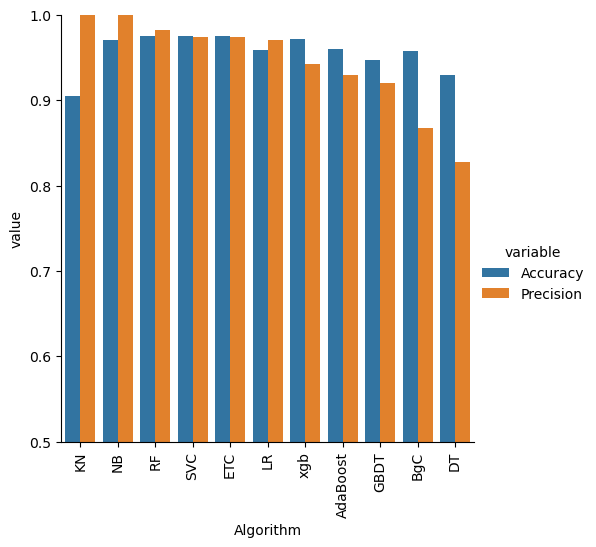

In [64]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## Naive Bayes is better chice as it has highest precision and then accuracy. So we will go for it.
## We can use GridSearchCV for finding best hyperparameters and can check performance for for more preprocessed data.